# Laptop Device Machine Learning Model 📱

In [1]:
## importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb
from catboost import CatBoostClassifier

from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
from colorama import Fore, Back, Style 
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from mlxtend.plotting import plot_confusion_matrix

In [2]:
## reading the data
train_df = pd.read_csv('train.csv')
train_df.head()

,Unnamed: 0,Yearly_avg_view_on_travel_page,preferred_device,total_likes_on_outstation_checkin_given,yearly_avg_Outstation_checkins,member_in_family,preferred_location_type,Yearly_avg_comment_on_travel_page,total_likes_on_outofstation_checkin_received,week_since_last_outstation_checkin,following_company_page,montly_avg_comment_on_company_page,working_flag,travelling_network_rating,Adult_flag,Daily_Avg_mins_spend_on_traveling_page,Taken_product
0,10381,396,1,22159,21,4,1,89,5505,0,1,28,1,4,0,16,0
1,322,240,1,35630,1,4,7,74,5055,7,0,16,0,3,0,10,0
2,6296,289,0,52160,2,2,0,47,1713,1,1,31,1,3,1,1,0
3,6162,227,0,15482,2,2,0,47,4559,1,0,30,0,1,0,10,0
4,5799,234,1,39424,1,3,3,61,5059,2,0,30,1,2,0,16,0


In [3]:
train_df.drop(columns={'Unnamed: 0'},inplace=True)

In [4]:
train_df.shape

(4461, 16)

In the main notebook we have labelled `Mobile` as **1** and `Laptop` as **0**

In [5]:
## selecting only those rows that have preferred device as 0
train_df = train_df[train_df['preferred_device']==0]

In [6]:
train_df.preferred_device.value_counts()

preferred_device
0    564
Name: count, dtype: int64

In [7]:
## we can now drop 'preferred_device' column
train_df.drop(columns={'preferred_device'},inplace=True)
train_df.head()

,Yearly_avg_view_on_travel_page,total_likes_on_outstation_checkin_given,yearly_avg_Outstation_checkins,member_in_family,preferred_location_type,Yearly_avg_comment_on_travel_page,total_likes_on_outofstation_checkin_received,week_since_last_outstation_checkin,following_company_page,montly_avg_comment_on_company_page,working_flag,travelling_network_rating,Adult_flag,Daily_Avg_mins_spend_on_traveling_page,Taken_product
2,289,52160,2,2,0,47,1713,1,1,31,1,3,1,1,0
3,227,15482,2,2,0,47,4559,1,0,30,0,1,0,10,0
8,333,49782,2,4,0,104,5684,1,0,29,1,3,1,7,0
10,239,18317,2,3,0,100,3731,6,1,18,0,3,1,7,1
16,333,28295,17,3,14,52,2495,10,1,28,0,4,1,11,1


In [8]:
train_df.shape

(564, 15)

In [9]:
## X and y attributes
X_train = train_df.drop(columns={'Taken_product'})
y_train = train_df['Taken_product']

### Test data

In [10]:
test_df = pd.read_csv('test.csv')
test_df.drop(columns={'Unnamed: 0'},inplace=True)
test_df = test_df[test_df['preferred_device']==0]

In [11]:
test_df.head()

,Yearly_avg_view_on_travel_page,preferred_device,total_likes_on_outstation_checkin_given,yearly_avg_Outstation_checkins,member_in_family,preferred_location_type,Yearly_avg_comment_on_travel_page,total_likes_on_outofstation_checkin_received,week_since_last_outstation_checkin,following_company_page,montly_avg_comment_on_company_page,working_flag,travelling_network_rating,Adult_flag,Daily_Avg_mins_spend_on_traveling_page,Taken_product
7,210,0,45447,5,2,0,69,2443,1,1,28,0,3,0,13,0
38,246,0,15578,5,3,1,103,2857,1,0,27,0,3,1,2,0
46,329,0,18659,29,2,0,107,4603,3,0,18,0,2,1,24,0
56,188,0,13382,9,3,6,99,3230,2,1,22,0,3,0,9,1
58,384,0,33615,1,4,10,95,4781,4,1,38,0,4,0,14,1


In [12]:
test_df.drop(columns={'preferred_device'},inplace=True)

In [13]:
test_df.shape

(217, 15)

In [14]:
## X and y attributes
X_test = test_df.drop(['Taken_product'],axis=1)
y_test = test_df['Taken_product']

## Model Building

In [15]:
accuracy_list = []

In [16]:
## scaling the values of some features
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

### 1. Random forest 🌳🌲🌳

In [17]:
r_clf = RandomForestClassifier(max_features=0.7,max_depth=10, random_state=20)
r_clf.fit(X_train, y_train)
r_pred = r_clf.predict(X_test)
r_acc = accuracy_score(y_test, r_pred)
accuracy_list.append(100*r_acc)

In [18]:
print(Fore.GREEN + "Accuracy of Random Forest Classifier is : ", "{:.2f}%".format(100* r_acc))

Accuracy of Random Forest Classifier is :  95.39%


<Figure size 640x480 with 0 Axes>

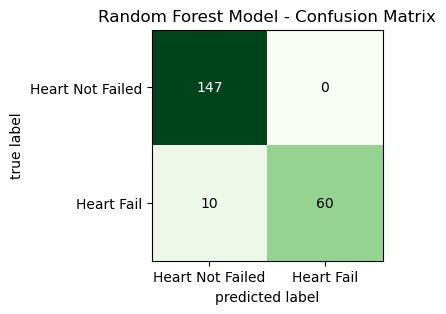

In [19]:
cm = confusion_matrix(y_test, r_pred)
plt.figure()
plot_confusion_matrix(cm, figsize=(3,3), hide_ticks=True, cmap=plt.cm.Greens)
plt.title("Random Forest Model - Confusion Matrix")
plt.xticks(range(2), ["Heart Not Failed","Heart Fail"], fontsize=10)
plt.yticks(range(2), ["Heart Not Failed","Heart Fail"], fontsize=10)
plt.show();

In [20]:
print(classification_report(y_test,r_pred))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97       147
           1       1.00      0.86      0.92        70

    accuracy                           0.95       217
   macro avg       0.97      0.93      0.95       217
weighted avg       0.96      0.95      0.95       217



### 2. Logistic regression

In [21]:
log_reg = LogisticRegression(max_iter=100)
log_reg.fit(X_train, y_train)
log_reg_pred = log_reg.predict(X_test)
log_reg_acc = accuracy_score(y_test, log_reg_pred)
accuracy_list.append(100*log_reg_acc)

In [22]:
print(Fore.BLUE + "Accuracy of Logistic Regression is : ", "{:.2f}%".format(100* log_reg_acc))

Accuracy of Logistic Regression is :  80.65%


<Figure size 640x480 with 0 Axes>

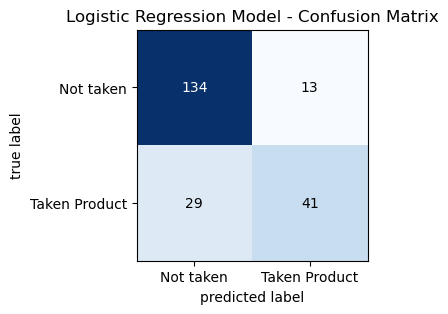

In [23]:
cm = confusion_matrix(y_test, log_reg_pred)
plt.figure()
plot_confusion_matrix(cm, figsize=(3,3), hide_ticks=True, cmap=plt.cm.Blues)
plt.title("Logistic Regression Model - Confusion Matrix")
plt.xticks(range(2), ["Not taken","Taken Product"], fontsize=10)
plt.yticks(range(2), ["Not taken","Taken Product"], fontsize=10)
plt.show();

In [24]:
print(classification_report(y_test,log_reg_pred))

              precision    recall  f1-score   support

           0       0.82      0.91      0.86       147
           1       0.76      0.59      0.66        70

    accuracy                           0.81       217
   macro avg       0.79      0.75      0.76       217
weighted avg       0.80      0.81      0.80       217



### 3. Support Vector

In [25]:
sv_clf = SVC()
sv_clf.fit(X_train, y_train)
sv_clf_pred = sv_clf.predict(X_test)
sv_clf_acc = accuracy_score(y_test, sv_clf_pred)
accuracy_list.append(100* sv_clf_acc)

In [26]:
print(Fore.RED + "Accuracy of SVC is : ", "{:.2f}%".format(100* sv_clf_acc))

Accuracy of SVC is :  89.86%


<Figure size 640x480 with 0 Axes>

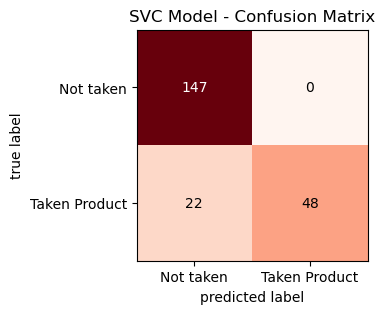

In [27]:
cm = confusion_matrix(y_test, sv_clf_pred)
plt.figure()
plot_confusion_matrix(cm, figsize=(3,3), hide_ticks=True, cmap=plt.cm.Reds)
plt.title("SVC Model - Confusion Matrix")
plt.xticks(range(2), ["Not taken","Taken Product"], fontsize=10)
plt.yticks(range(2), ["Not taken","Taken Product"], fontsize=10)
plt.show()

In [28]:
print(classification_report(y_test,sv_clf_pred))

              precision    recall  f1-score   support

           0       0.87      1.00      0.93       147
           1       1.00      0.69      0.81        70

    accuracy                           0.90       217
   macro avg       0.93      0.84      0.87       217
weighted avg       0.91      0.90      0.89       217



### 4. Decision Tree

In [29]:
dt_clf = DecisionTreeClassifier(max_leaf_nodes=3, random_state=0, criterion='entropy')
dt_clf.fit(X_train, y_train)
dt_pred = dt_clf.predict(X_test)
dt_acc = accuracy_score(y_test, dt_pred)
accuracy_list.append(100*dt_acc)

In [30]:
print(Fore.GREEN + "Accuracy of Decision Tree Classifier is : ", "{:.2f}%".format(100* dt_acc))

Accuracy of Decision Tree Classifier is :  72.81%


<Figure size 640x480 with 0 Axes>

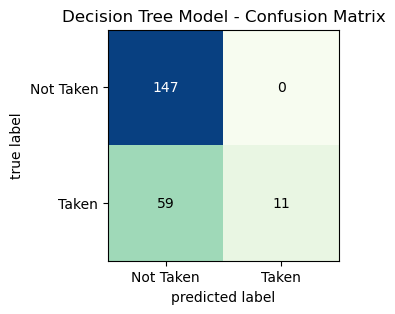

In [31]:
cm = confusion_matrix(y_test, dt_pred)
plt.figure()
plot_confusion_matrix(cm, figsize=(3,3), hide_ticks=True, cmap=plt.cm.GnBu)
plt.title("Decision Tree Model - Confusion Matrix")
plt.xticks(range(2), ["Not Taken","Taken"], fontsize=10)
plt.yticks(range(2), ["Not Taken","Taken"], fontsize=10)
plt.show()

In [32]:
print(classification_report(y_test,dt_pred))

              precision    recall  f1-score   support

           0       0.71      1.00      0.83       147
           1       1.00      0.16      0.27        70

    accuracy                           0.73       217
   macro avg       0.86      0.58      0.55       217
weighted avg       0.81      0.73      0.65       217



### 5. KNN Classifier

In [33]:
kn_clf = KNeighborsClassifier(n_neighbors=5)
kn_clf.fit(X_train, y_train)
kn_pred = kn_clf.predict(X_test)
kn_acc = accuracy_score(y_test, kn_pred)
accuracy_list.append(100*kn_acc)

C:\Users\srshu\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [34]:
print(Fore.YELLOW + "Accuracy of K Neighbors Classifier is : ", "{:.2f}%".format(100* kn_acc))

Accuracy of K Neighbors Classifier is :  88.48%


<Figure size 640x480 with 0 Axes>

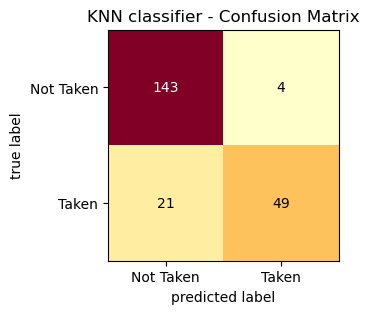

In [35]:
cm = confusion_matrix(y_test, kn_pred)
plt.figure()
plot_confusion_matrix(cm, figsize=(3,3), hide_ticks=True, cmap=plt.cm.YlOrRd)
plt.title("KNN classifier - Confusion Matrix")
plt.xticks(range(2), ["Not Taken","Taken"], fontsize=10)
plt.yticks(range(2), ["Not Taken","Taken"], fontsize=10)
plt.show();

In [36]:
print(classification_report(y_test,kn_pred))

              precision    recall  f1-score   support

           0       0.87      0.97      0.92       147
           1       0.92      0.70      0.80        70

    accuracy                           0.88       217
   macro avg       0.90      0.84      0.86       217
weighted avg       0.89      0.88      0.88       217



### 6. Gradient Boosting

In [37]:
gb_clf = GradientBoostingClassifier(max_depth=10, random_state=50)
gb_clf.fit(X_train, y_train)
gb_pred = gb_clf.predict(X_test)
gb_acc = accuracy_score(y_test, gb_pred)
accuracy_list.append(100*gb_acc)

In [38]:
print(Fore.LIGHTCYAN_EX + "Accuracy of Gradient Boosting is : ", "{:.2f}%".format(100* gb_acc))

Accuracy of Gradient Boosting is :  97.70%


<Figure size 640x480 with 0 Axes>

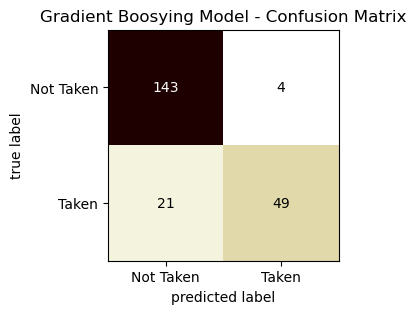

In [39]:
## confusion_matrix
m = confusion_matrix(y_test, gb_pred)
plt.figure()
plot_confusion_matrix(cm, figsize=(3,3), hide_ticks=True, cmap=plt.cm.pink_r)
plt.title("Gradient Boosying Model - Confusion Matrix")
plt.xticks(range(2), ["Not Taken","Taken"], fontsize=10)
plt.yticks(range(2), ["Not Taken","Taken"], fontsize=10)
plt.show()

In [40]:
print(classification_report(y_test,gb_pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98       147
           1       1.00      0.93      0.96        70

    accuracy                           0.98       217
   macro avg       0.98      0.96      0.97       217
weighted avg       0.98      0.98      0.98       217



### 7. xgbrf Clasifier

In [41]:
xgb_clf = xgb.XGBRFClassifier(max_depth=20, random_state=50)
xgb_clf.fit(X_train,y_train)
xgb_pred = xgb_clf.predict(X_test)
xgb_acc = accuracy_score(y_test, xgb_pred)
accuracy_list.append(100*xgb_acc)

In [42]:
print(Fore.LIGHTMAGENTA_EX + "Accuracy of XGBRFClassifier is : ", "{:.2f}%".format(100* xgb_acc))

Accuracy of XGBRFClassifier is :  94.01%


<Figure size 640x480 with 0 Axes>

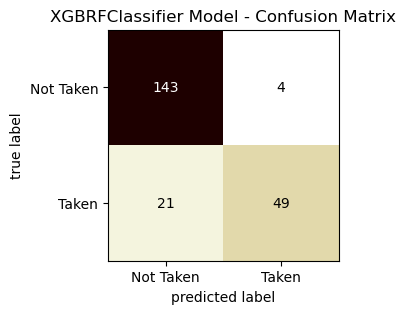

In [43]:
m = confusion_matrix(y_test, xgb_pred)
plt.figure()
plot_confusion_matrix(cm, figsize=(3,3), hide_ticks=True, cmap=plt.cm.pink_r)
plt.title("XGBRFClassifier Model - Confusion Matrix")
plt.xticks(range(2), ["Not Taken","Taken"], fontsize=10)
plt.yticks(range(2), ["Not Taken","Taken"], fontsize=10)
plt.show()

In [44]:
print(classification_report(y_test,xgb_pred))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96       147
           1       1.00      0.81      0.90        70

    accuracy                           0.94       217
   macro avg       0.96      0.91      0.93       217
weighted avg       0.94      0.94      0.94       217



### 8. CatBoost Classifier

In [45]:
cat_clf = CatBoostClassifier()
cat_clf.fit(X_train,y_train)
cat_pred = cat_clf.predict(X_test)
cat_acc = accuracy_score(y_test, cat_pred)
accuracy_list.append(100*cat_acc)

Learning rate set to 0.008067
0:	learn: 0.6868692	total: 141ms	remaining: 2m 20s
1:	learn: 0.6801673	total: 143ms	remaining: 1m 11s
2:	learn: 0.6734955	total: 145ms	remaining: 48.1s
3:	learn: 0.6677217	total: 148ms	remaining: 36.8s
4:	learn: 0.6608396	total: 152ms	remaining: 30.3s
5:	learn: 0.6544655	total: 155ms	remaining: 25.7s
6:	learn: 0.6481208	total: 158ms	remaining: 22.5s
7:	learn: 0.6433941	total: 162ms	remaining: 20s
8:	learn: 0.6380976	total: 165ms	remaining: 18.2s
9:	learn: 0.6315619	total: 168ms	remaining: 16.6s
10:	learn: 0.6273293	total: 170ms	remaining: 15.3s
11:	learn: 0.6208064	total: 173ms	remaining: 14.2s
12:	learn: 0.6185419	total: 174ms	remaining: 13.2s
13:	learn: 0.6124000	total: 177ms	remaining: 12.5s
14:	learn: 0.6070412	total: 181ms	remaining: 11.9s
15:	learn: 0.6035498	total: 184ms	remaining: 11.3s
16:	learn: 0.5988808	total: 187ms	remaining: 10.8s
17:	learn: 0.5950684	total: 190ms	remaining: 10.4s
18:	learn: 0.5915852	total: 192ms	remaining: 9.93s
19:	learn: 

261:	learn: 0.1967405	total: 532ms	remaining: 1.5s
262:	learn: 0.1959796	total: 533ms	remaining: 1.49s
263:	learn: 0.1950523	total: 535ms	remaining: 1.49s
264:	learn: 0.1942856	total: 537ms	remaining: 1.49s
265:	learn: 0.1936265	total: 538ms	remaining: 1.49s
266:	learn: 0.1930791	total: 540ms	remaining: 1.48s
267:	learn: 0.1927282	total: 541ms	remaining: 1.48s
268:	learn: 0.1922983	total: 543ms	remaining: 1.47s
269:	learn: 0.1916651	total: 544ms	remaining: 1.47s
270:	learn: 0.1912562	total: 545ms	remaining: 1.47s
271:	learn: 0.1907722	total: 547ms	remaining: 1.46s
272:	learn: 0.1899970	total: 548ms	remaining: 1.46s
273:	learn: 0.1894174	total: 549ms	remaining: 1.46s
274:	learn: 0.1889710	total: 550ms	remaining: 1.45s
275:	learn: 0.1885643	total: 552ms	remaining: 1.45s
276:	learn: 0.1878568	total: 553ms	remaining: 1.44s
277:	learn: 0.1874592	total: 554ms	remaining: 1.44s
278:	learn: 0.1871562	total: 555ms	remaining: 1.44s
279:	learn: 0.1867192	total: 557ms	remaining: 1.43s
280:	learn: 0

438:	learn: 0.1267912	total: 773ms	remaining: 988ms
439:	learn: 0.1264958	total: 775ms	remaining: 986ms
440:	learn: 0.1261317	total: 776ms	remaining: 983ms
441:	learn: 0.1259205	total: 777ms	remaining: 981ms
442:	learn: 0.1256475	total: 778ms	remaining: 979ms
443:	learn: 0.1253201	total: 780ms	remaining: 976ms
444:	learn: 0.1249436	total: 781ms	remaining: 974ms
445:	learn: 0.1247475	total: 782ms	remaining: 972ms
446:	learn: 0.1244742	total: 783ms	remaining: 969ms
447:	learn: 0.1242681	total: 785ms	remaining: 967ms
448:	learn: 0.1240451	total: 786ms	remaining: 965ms
449:	learn: 0.1236995	total: 787ms	remaining: 962ms
450:	learn: 0.1234923	total: 789ms	remaining: 960ms
451:	learn: 0.1232253	total: 790ms	remaining: 958ms
452:	learn: 0.1229461	total: 791ms	remaining: 956ms
453:	learn: 0.1226982	total: 793ms	remaining: 953ms
454:	learn: 0.1224684	total: 794ms	remaining: 951ms
455:	learn: 0.1222467	total: 795ms	remaining: 949ms
456:	learn: 0.1218417	total: 796ms	remaining: 946ms
457:	learn: 

711:	learn: 0.0730114	total: 1.13s	remaining: 458ms
712:	learn: 0.0728539	total: 1.13s	remaining: 456ms
713:	learn: 0.0726811	total: 1.13s	remaining: 454ms
714:	learn: 0.0725236	total: 1.14s	remaining: 453ms
715:	learn: 0.0723289	total: 1.14s	remaining: 451ms
716:	learn: 0.0722576	total: 1.14s	remaining: 450ms
717:	learn: 0.0721354	total: 1.14s	remaining: 448ms
718:	learn: 0.0719899	total: 1.14s	remaining: 446ms
719:	learn: 0.0717860	total: 1.14s	remaining: 445ms
720:	learn: 0.0716001	total: 1.14s	remaining: 443ms
721:	learn: 0.0713763	total: 1.15s	remaining: 441ms
722:	learn: 0.0712718	total: 1.15s	remaining: 440ms
723:	learn: 0.0710954	total: 1.15s	remaining: 438ms
724:	learn: 0.0709515	total: 1.15s	remaining: 436ms
725:	learn: 0.0707894	total: 1.15s	remaining: 435ms
726:	learn: 0.0706915	total: 1.15s	remaining: 433ms
727:	learn: 0.0705209	total: 1.15s	remaining: 431ms
728:	learn: 0.0703318	total: 1.16s	remaining: 429ms
729:	learn: 0.0701306	total: 1.16s	remaining: 428ms
730:	learn: 

966:	learn: 0.0448608	total: 1.53s	remaining: 52.3ms
967:	learn: 0.0447823	total: 1.53s	remaining: 50.7ms
968:	learn: 0.0447074	total: 1.54s	remaining: 49.2ms
969:	learn: 0.0446677	total: 1.54s	remaining: 47.6ms
970:	learn: 0.0445414	total: 1.54s	remaining: 46ms
971:	learn: 0.0444603	total: 1.54s	remaining: 44.4ms
972:	learn: 0.0443861	total: 1.54s	remaining: 42.8ms
973:	learn: 0.0443084	total: 1.54s	remaining: 41.2ms
974:	learn: 0.0442334	total: 1.55s	remaining: 39.7ms
975:	learn: 0.0441413	total: 1.55s	remaining: 38.1ms
976:	learn: 0.0440438	total: 1.55s	remaining: 36.5ms
977:	learn: 0.0439623	total: 1.55s	remaining: 34.9ms
978:	learn: 0.0438893	total: 1.55s	remaining: 33.3ms
979:	learn: 0.0438402	total: 1.55s	remaining: 31.7ms
980:	learn: 0.0437564	total: 1.56s	remaining: 30.1ms
981:	learn: 0.0436936	total: 1.56s	remaining: 28.5ms
982:	learn: 0.0436251	total: 1.56s	remaining: 27ms
983:	learn: 0.0435541	total: 1.56s	remaining: 25.4ms
984:	learn: 0.0434713	total: 1.56s	remaining: 23.8

In [46]:
print(Fore.GREEN + "Accuracy of CatBoostClassifier is : ","{:.2f}%".format(100* cat_acc))

Accuracy of CatBoostClassifier is :  96.31%


<Figure size 640x480 with 0 Axes>

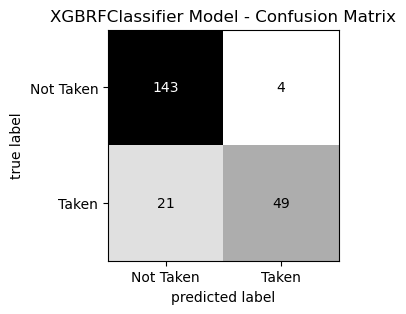

In [47]:
m = confusion_matrix(y_test, cat_pred)
plt.figure()
plot_confusion_matrix(cm, figsize=(3,3), hide_ticks=True, cmap=plt.cm.gray_r)
plt.title("XGBRFClassifier Model - Confusion Matrix")
plt.xticks(range(2), ["Not Taken","Taken"], fontsize=10)
plt.yticks(range(2), ["Not Taken","Taken"], fontsize=10)
plt.show()

In [48]:
print(classification_report(y_test,cat_pred))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97       147
           1       1.00      0.89      0.94        70

    accuracy                           0.96       217
   macro avg       0.97      0.94      0.96       217
weighted avg       0.97      0.96      0.96       217



In [49]:
model_list = ['Random Forest','Logistic regression','SVM','Decision Tree','KNN Classifier','Gradient Boosting',
              'xgbrf Clasifier','Cat Boost Classifier']

In [50]:
accuracy_list

[95.39170506912443,
 80.64516129032258,
 89.86175115207374,
 72.81105990783409,
 88.47926267281106,
 97.6958525345622,
 94.00921658986175,
 96.31336405529954]

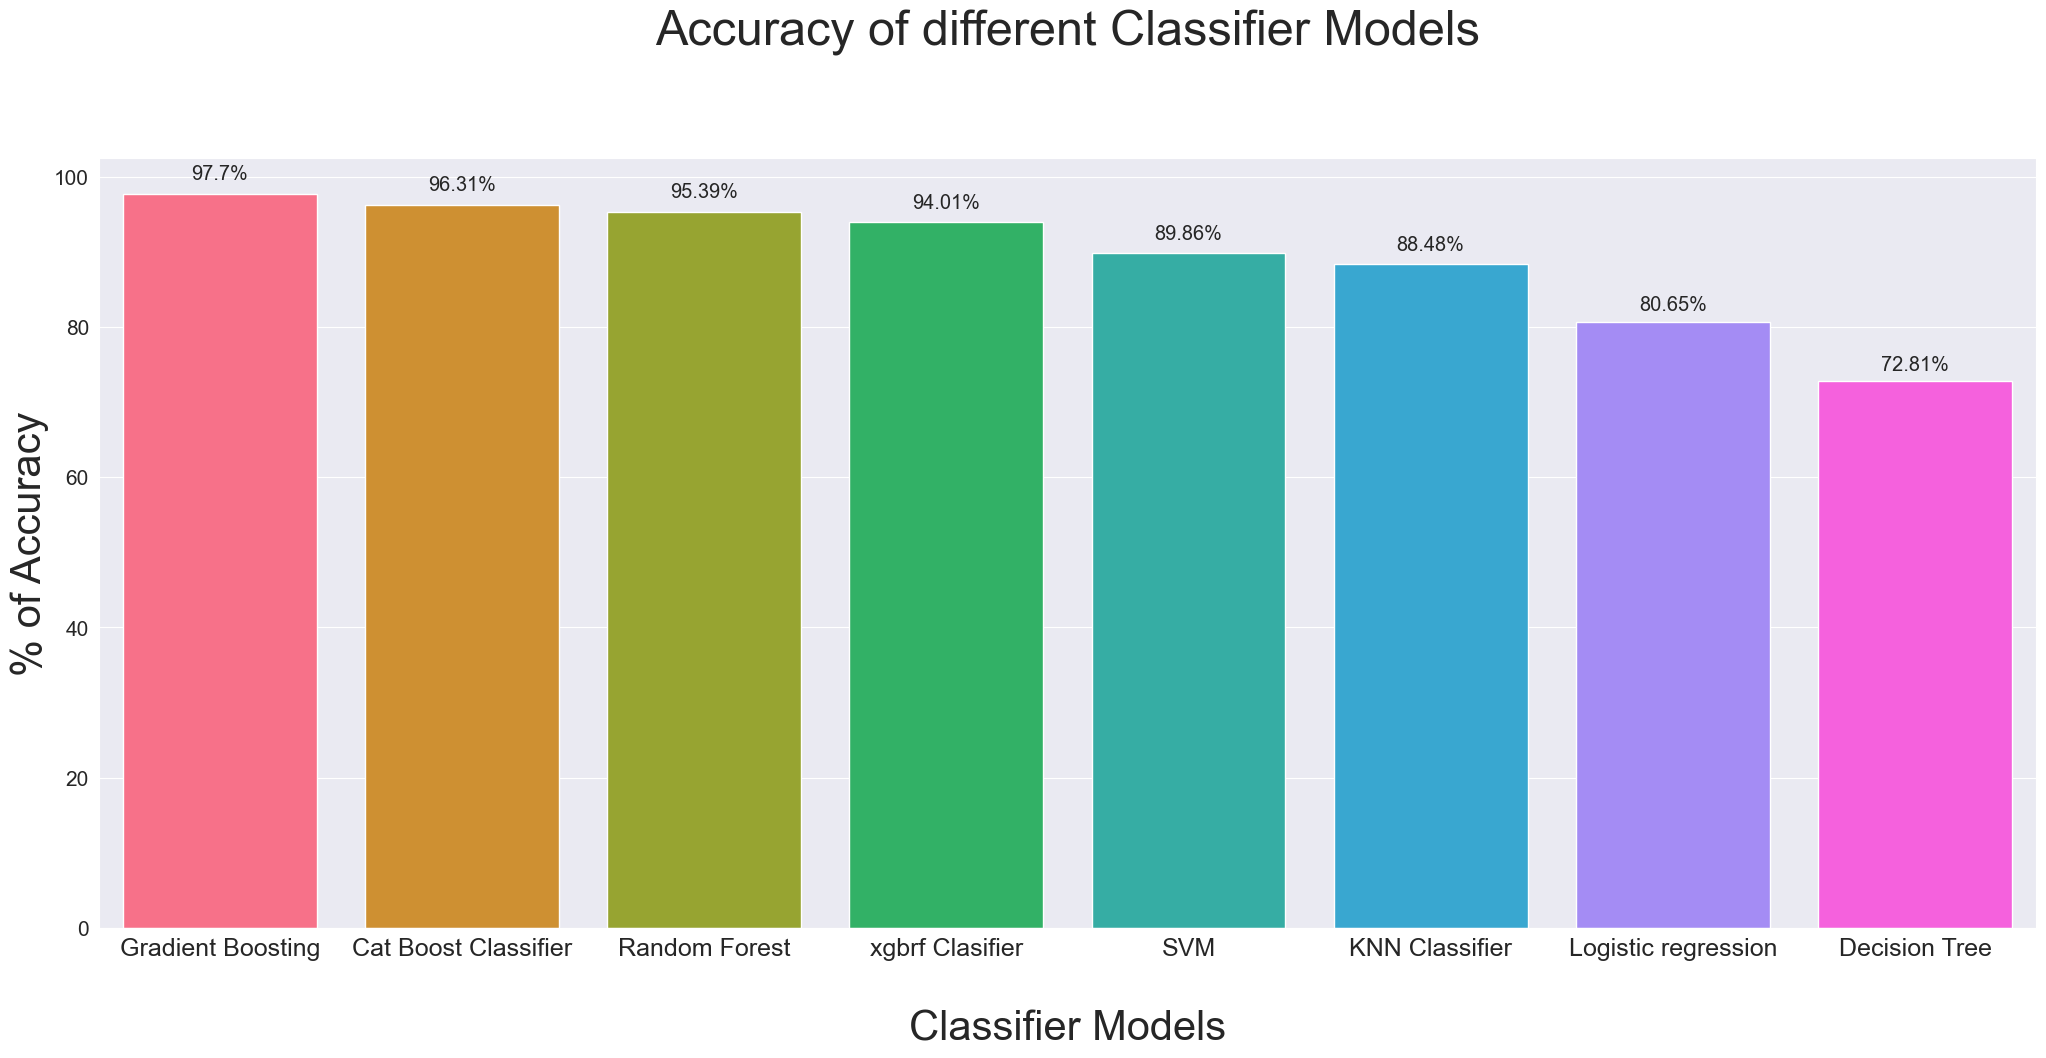

In [51]:
plt.rcParams['figure.figsize']=25,10
sns.set_style('darkgrid')

# Sort the data in descending order
sorted_indices = sorted(range(len(accuracy_list)), key=lambda k: accuracy_list[k], reverse=True)
sorted_model_list = [model_list[i] for i in sorted_indices]
sorted_accuracy_list = [accuracy_list[i] for i in sorted_indices]

ax = sns.barplot(x=sorted_model_list, y=sorted_accuracy_list, palette = "husl", saturation=2.0)
plt.xlabel('\nClassifier Models', fontsize = 30 )
plt.ylabel('% of Accuracy', fontsize = 30)
plt.title('Accuracy of different Classifier Models\n\n', fontsize = 35)
plt.xticks(fontsize = 18, horizontalalignment = 'center', rotation =0)
plt.yticks(fontsize = 15)

for i in ax.patches:
    width, height = i.get_width(), i.get_height()
    x, y = i.get_xy() 
    ax.annotate(f'{round(height,2)}%', (x + width/2, y + height*1.02), ha='center', fontsize = 'x-large')
plt.show()

## Model Accuracy

* Gradient Boosting - 97.70%
* Cat Boost- 96.31%
* Random Forest - 95.39%
* xgbrf Classifier - 94.01%
* SVM - 89.86%
* KNN Classifier - 88.48%
* Logistic regression - 80.65%
* Decision Tree - 72.81%